In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['target']=le.fit_transform(df['target'])
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
df.duplicated().sum()

403

In [11]:
df=df.drop_duplicates(keep='first')
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [12]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

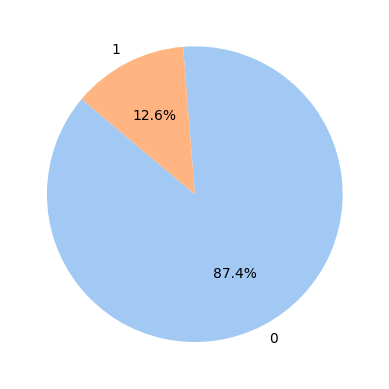

In [13]:
labels=[0,1]
size=[4516,653]
colors = sns.color_palette('pastel')[0:len(labels)]
plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title (optional)
# plt.title('Distribution of Categories')

# Display the chart
plt.show()

In [14]:
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\good
[nltk_data]     day\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['num_characteristics']=df['text'].apply(len)

C:\Users\good day\AppData\Local\Temp\ipykernel_10772\3374250287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characteristics']=df['text'].apply(len)


In [17]:
df

,target,text,num_characteristics
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [18]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\good day\AppData\Local\Temp\ipykernel_10772\76344806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [19]:
df

,target,text,num_characteristics,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [20]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\good day\AppData\Local\Temp\ipykernel_10772\4112269855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [21]:
df

,target,text,num_characteristics,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [22]:
df.describe()

,target,num_characteristics,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [23]:
df[df['target']==0].describe()

,target,num_characteristics,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [24]:
df[df['target']==1].describe()

,target,num_characteristics,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='num_characteristics', ylabel='Count'>

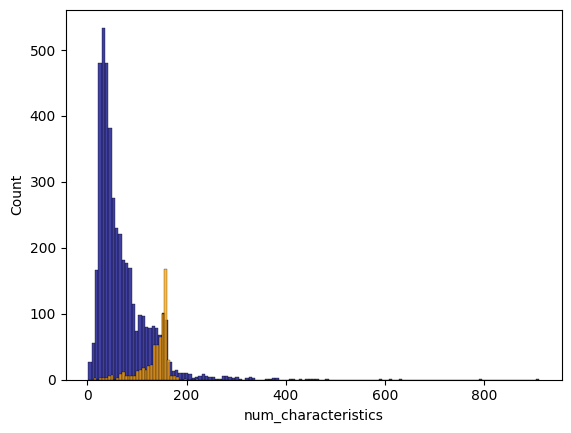

In [25]:
sns.histplot(df[df['target']==0]['num_characteristics'],color='navy')
sns.histplot(df[df['target']==1]['num_characteristics'],color='orange')

<Axes: xlabel='num_words', ylabel='Count'>

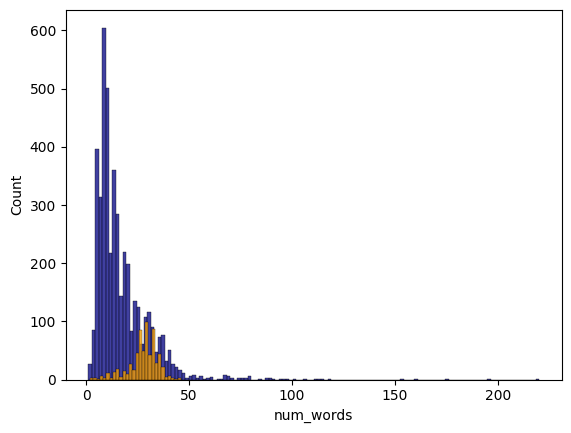

In [26]:
sns.histplot(df[df['target']==0]['num_words'],color='navy')
sns.histplot(df[df['target']==1]['num_words'],color='orange')

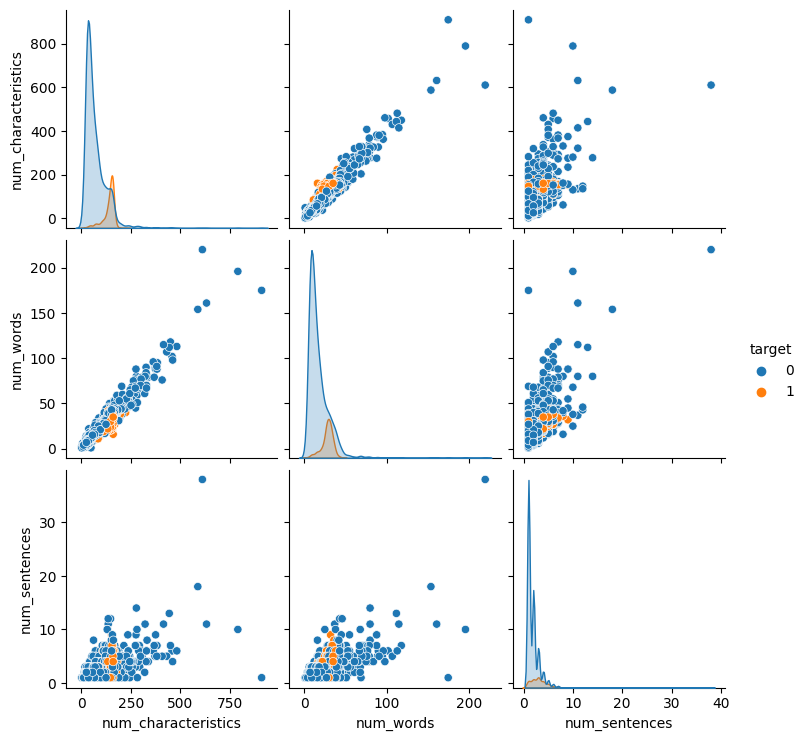

In [27]:
sns.pairplot(df,hue='target')

C:\Users\good day\AppData\Local\Temp\ipykernel_10772\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

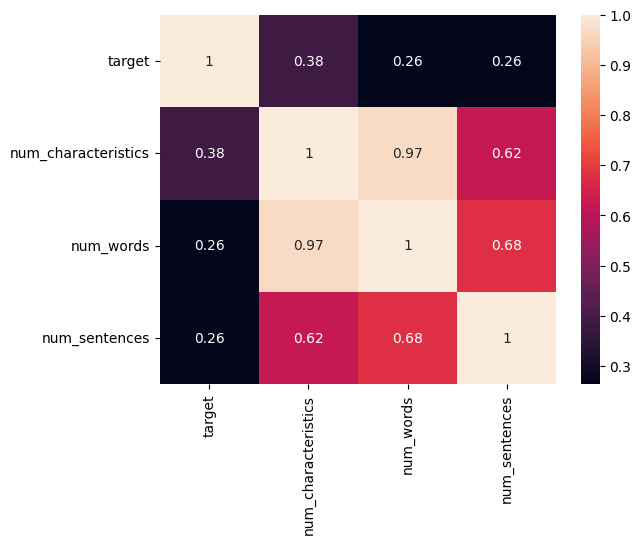

In [28]:
sns.heatmap(df.corr(),annot=True)

In [29]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('dancing')

'danc'

In [30]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import string

# Access the string punctuation constants
punctuation = string.punctuation

[nltk_data] Downloading package stopwords to C:\Users\good
[nltk_data]     day\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
import nltk
from nltk.tokenize import word_tokenize

def transform_text(text):
    text = text.lower()
    text = word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english')and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [32]:
df['transformed_test']=df['text'].apply(transform_text)

C:\Users\good day\AppData\Local\Temp\ipykernel_10772\2854848212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_test']=df['text'].apply(transform_text)


In [33]:
df

,target,text,num_characteristics,num_words,num_sentences,transformed_test
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [34]:
from wordcloud import WordCloud  # Note the correct capitalization: WordCloud

# Create a WordCloud instance with the correct arguments
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Now you can use this 'wc' object to generate a WordCloud


In [35]:
spam_wc=wc.generate(df[df['target']==1]['transformed_test'].str.cat(sep=" "))

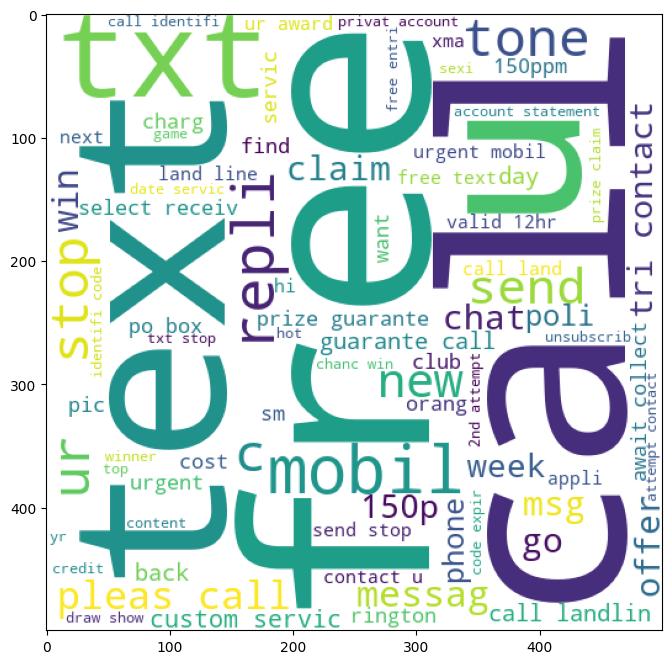

In [36]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

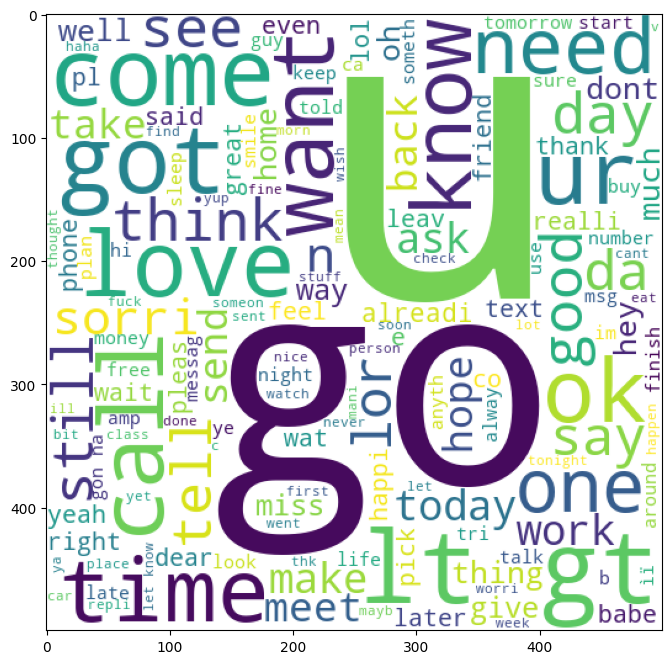

In [37]:
ham_wc=wc.generate(df[df['target']==0]['transformed_test'].str.cat(sep=" "))
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)

In [38]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_test'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [39]:
len(spam_corpus)

9939

In [40]:
from collections import Counter
top_30=pd.DataFrame(Counter(spam_corpus).most_common(30))

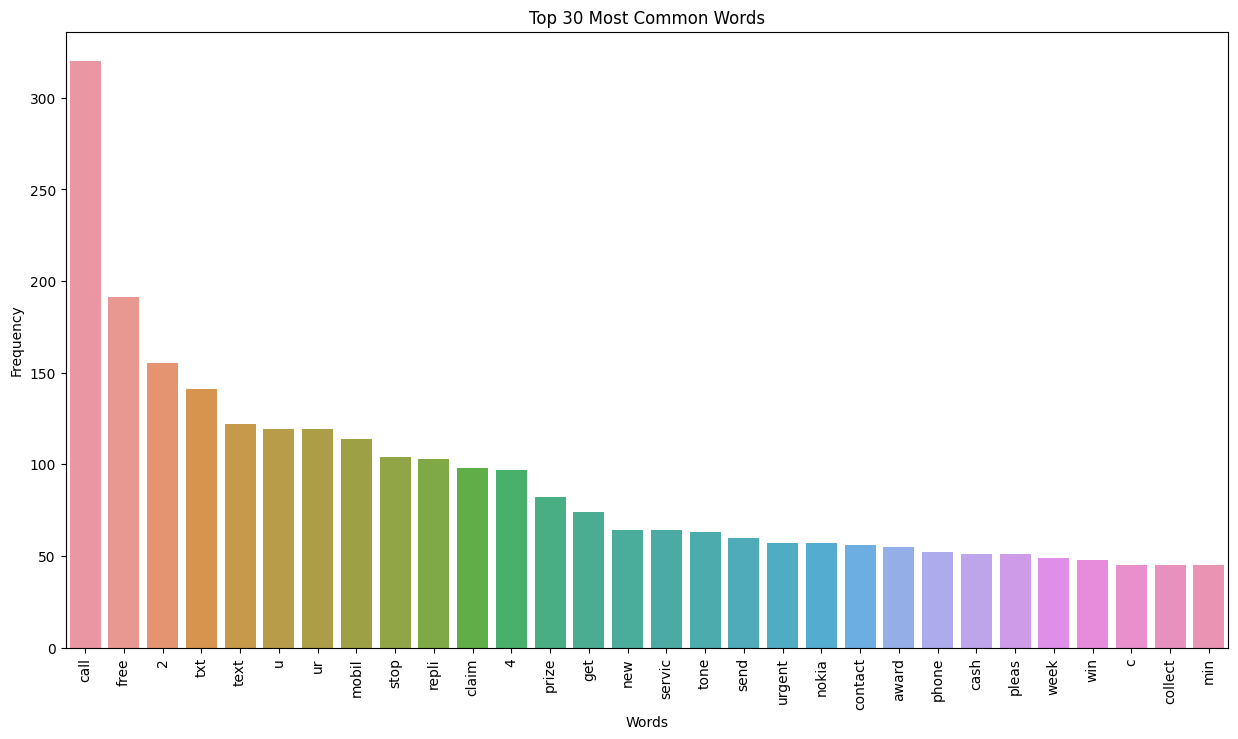

In [41]:
plt.figure(figsize=(15,8))
sns.barplot(x=top_30[0], y=top_30[1])

# Optionally, you can set labels and titles as needed
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words")

# Show the plot
plt.show()

In [42]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_test'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [43]:
len(ham_corpus)

35404

In [44]:
from collections import Counter
top_30_ham=pd.DataFrame(Counter(ham_corpus).most_common(30))

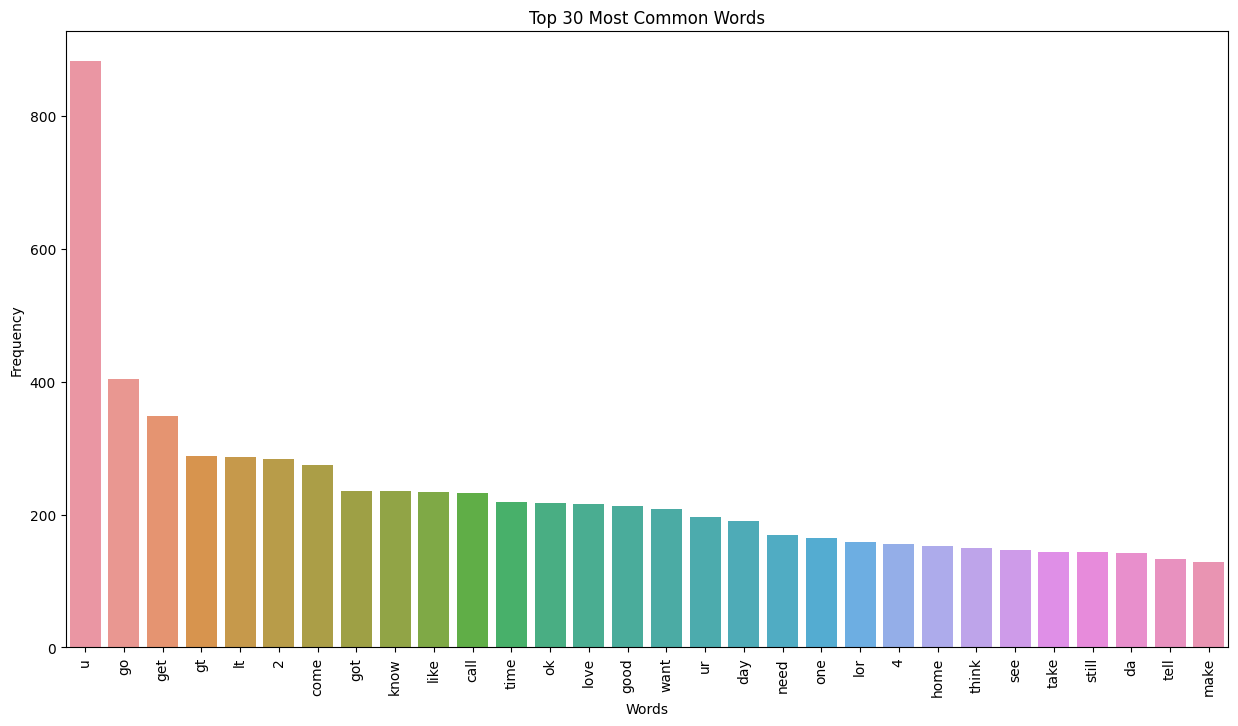

In [45]:
plt.figure(figsize=(15,8))
sns.barplot(x=top_30_ham[0], y=top_30_ham[1])

# Optionally, you can set labels and titles as needed
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words")

# Show the plot
plt.show()

In [46]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
X=cv.fit_transform(df['transformed_test']).toarray()
y=df['target'].values

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [48]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
gnb=GaussianNB()
bnb=BernoulliNB()
mnb=MultinomialNB()

In [49]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
acc=accuracy_score(y_pred1,y_test)
cm=confusion_matrix(y_pred1,y_test)
ps=precision_score(y_pred1,y_test)
print('accuracy score_GNB:', acc)
print(cm)
print('precision score:',ps)

accuracy score_GNB: 0.8800773694390716
[[792  20]
 [104 118]]
precision score: 0.855072463768116


In [51]:
bnb.fit(X_train,y_train)
y_pred2=bnb.predict(X_test)
acc=accuracy_score(y_pred2,y_test)
cm=confusion_matrix(y_pred2,y_test)
ps=precision_score(y_pred2,y_test)
print('accuracy score_BNB:', acc)
print(cm)
print('precision score_BNB:',ps)

accuracy score_BNB: 0.9700193423597679
[[893  28]
 [  3 110]]
precision score_BNB: 0.7971014492753623


In [52]:
mnb.fit(X_train,y_train)
y_pred3=mnb.predict(X_test)
acc=accuracy_score(y_pred3,y_test)
cm=confusion_matrix(y_pred3,y_test)
ps=precision_score(y_pred3,y_test)
print('accuracy score_MNB:', acc)
print(cm)
print('precision score_MNB:',ps)

accuracy score_MNB: 0.9642166344294004
[[871  12]
 [ 25 126]]
precision score_MNB: 0.9130434782608695


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRFClassifier

In [54]:
svc=SVC(kernel='sigmoid',gamma=1)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBRFClassifier(n_estimators=50,random_state=2)

In [56]:
clfs={
    'svc':svc,
    'knc':knc,
    'mnb':mnb,
    'dtc':dtc,
    'lrc':lrc,
    'rfc':rfc,
    'abc':abc,
    'bc':bc,
    'etc':etc,
    'gbc':gbc,
    'xgb':xgb
}

In [57]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return acc,precision

In [58]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9264990328820116, 0.7421875)

In [59]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print("for ",name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for  svc
Accuracy: 0.9264990328820116
Precision: 0.7421875
for  knc
Accuracy: 0.9061895551257253
Precision: 1.0
for  mnb
Accuracy: 0.9642166344294004
Precision: 0.8344370860927153
for  dtc
Accuracy: 0.9264990328820116
Precision: 0.9428571428571428
for  lrc
Accuracy: 0.9709864603481625
Precision: 0.9736842105263158
for  rfc
Accuracy: 0.971953578336557
Precision: 1.0
for  abc
Accuracy: 0.9632495164410058
Precision: 0.9464285714285714
for  bc
Accuracy: 0.9622823984526112
Precision: 0.9159663865546218
for  etc
Accuracy: 0.97678916827853
Precision: 0.9913793103448276
for  gbc
Accuracy: 0.9439071566731141
Precision: 0.9444444444444444
for  xgb
Accuracy: 0.9323017408123792
Precision: 0.9146341463414634


In [60]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,
                            "precision":precision_scores})
performance_df

,Algorithm,Accuracy,precision
0,svc,0.926499,0.742188
1,knc,0.906190,1.000000
2,mnb,0.964217,0.834437
3,dtc,0.926499,0.942857
4,lrc,0.970986,0.973684
5,rfc,0.971954,1.000000
6,abc,0.963250,0.946429
7,bc,0.962282,0.915966
8,etc,0.976789,0.991379
9,gbc,0.943907,0.944444


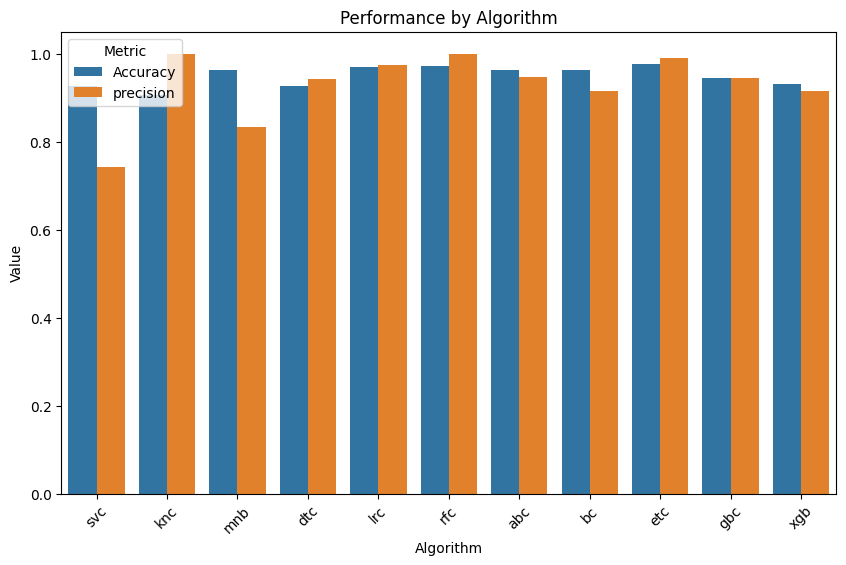

In [61]:
melted_df = pd.melt(performance_df, id_vars='Algorithm', value_vars=['Accuracy', 'precision'], var_name='Metric')
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='Algorithm', y='value', hue='Metric', data=melted_df)

# Set labels and title
plt.xlabel("Algorithm")
plt.ylabel("Value")
plt.title("Performance by Algorithm")

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [62]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df['transformed_test']).toarray()
y=df['target'].values

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
gnb=GaussianNB()
bnb=BernoulliNB()
mnb=MultinomialNB()
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
acc=accuracy_score(y_pred1,y_test)
cm=confusion_matrix(y_pred1,y_test)
ps=precision_score(y_pred1,y_test)
print('accuracy score_GNB:', acc)
print(cm)
print('precision score:',ps)

accuracy score_GNB: 0.8694390715667312
[[788  27]
 [108 111]]
precision score: 0.8043478260869565


In [64]:
bnb.fit(X_train,y_train)
y_pred2=bnb.predict(X_test)
acc=accuracy_score(y_pred2,y_test)
cm=confusion_matrix(y_pred2,y_test)
ps=precision_score(y_pred2,y_test)
print('accuracy score_BNB:', acc)
print(cm)
print('precision score_BNB:',ps)

accuracy score_BNB: 0.9835589941972921
[[895  16]
 [  1 122]]
precision score_BNB: 0.8840579710144928


In [65]:
mnb.fit(X_train,y_train)
y_pred3=mnb.predict(X_test)
acc=accuracy_score(y_pred3,y_test)
cm=confusion_matrix(y_pred3,y_test)
ps=precision_score(y_pred3,y_test)
print('accuracy score_MNB:', acc)
print(cm)
print('precision score_MNB:',ps)

accuracy score_MNB: 0.9709864603481625
[[896  30]
 [  0 108]]
precision score_MNB: 0.782608695652174


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRFClassifier

In [67]:
svc=SVC(kernel='sigmoid',gamma=1)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBRFClassifier(n_estimators=50,random_state=2)

In [69]:
clfs={
    'svc':svc,
    'knc':knc,
    'mnb':mnb,
    'dtc':dtc,
    'lrc':lrc,
    'rfc':rfc,
    'abc':abc,
    'bc':bc,
    'etc':etc,
    'gbc':gbc,
    'xgb':xgb
}

In [70]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return acc,precision

In [71]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print("for ",name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for  svc
Accuracy: 0.9758220502901354
Precision: 0.9747899159663865
for  knc
Accuracy: 0.9052224371373307
Precision: 1.0
for  mnb
Accuracy: 0.9709864603481625
Precision: 1.0
for  dtc
Accuracy: 0.9294003868471954
Precision: 0.8282828282828283
for  lrc
Accuracy: 0.9584139264990329
Precision: 0.9702970297029703
for  rfc
Accuracy: 0.9758220502901354
Precision: 0.9829059829059829
for  abc
Accuracy: 0.960348162475822
Precision: 0.9292035398230089
for  bc
Accuracy: 0.9584139264990329
Precision: 0.8682170542635659
for  etc
Accuracy: 0.9748549323017408
Precision: 0.9745762711864406
for  gbc
Accuracy: 0.9468085106382979
Precision: 0.9191919191919192
for  xgb
Accuracy: 0.9352030947775629
Precision: 0.8514851485148515


In [73]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_3000':accuracy_scores,
                            "precision_3000":precision_scores})
temp_df

,Algorithm,Accuracy_3000,precision_3000
0,svc,0.975822,0.974790
1,knc,0.905222,1.000000
2,mnb,0.970986,1.000000
3,dtc,0.929400,0.828283
4,lrc,0.958414,0.970297
5,rfc,0.975822,0.982906
6,abc,0.960348,0.929204
7,bc,0.958414,0.868217
8,etc,0.974855,0.974576
9,gbc,0.946809,0.919192


In [74]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy_3000_x,precision_3000_x,Accuracy_3000_y,precision_3000_y
0,svc,0.975822,0.974790,0.975822,0.974790
1,knc,0.905222,1.000000,0.905222,1.000000
2,mnb,0.970986,1.000000,0.970986,1.000000
3,dtc,0.929400,0.828283,0.929400,0.828283
4,lrc,0.958414,0.970297,0.958414,0.970297
5,rfc,0.975822,0.982906,0.975822,0.982906
6,abc,0.960348,0.929204,0.960348,0.929204
7,bc,0.958414,0.868217,0.958414,0.868217
8,etc,0.974855,0.974576,0.974855,0.974576
9,gbc,0.946809,0.919192,0.946809,0.919192


In [75]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [76]:
from sklearn.ensemble import StackingClassifier
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [77]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [78]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9816247582205029
0.9612403100775194


In [82]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))